In [1]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format = "retina"

sns.set(style="whitegrid", palette = "muted", font_scale= 1.2)

In [2]:
app_packages = [
    'com.anydo',
    'com.todoist',
    'com.ticktick.task',
    'com.habitrpg.android.habitica',
    'cc.forestapp',
    'com.oristats.habitbull',
    'com.levor.liferpgtasks',
    'com.habitnow',
    'com.microsoft.todos',
    'prox.lab.calclock',
    'com.gmail.jmartindev.timetune',
    'com.artfulagenda.app',
    'com.tasks.android',
    'com.appgenix.bizcal',
    'com.appxy.planner'
]

In [3]:
len(app_packages)

15

In [4]:
app_infos = []

for ap in tqdm(app_packages):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

100%|██████████| 15/15 [00:03<00:00,  3.91it/s]


In [5]:
def print_json(json_object):
    json_str = json.dumps(
        json_object, 
        indent = 2, 
        sort_keys= True, 
        default = str
    )
    
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

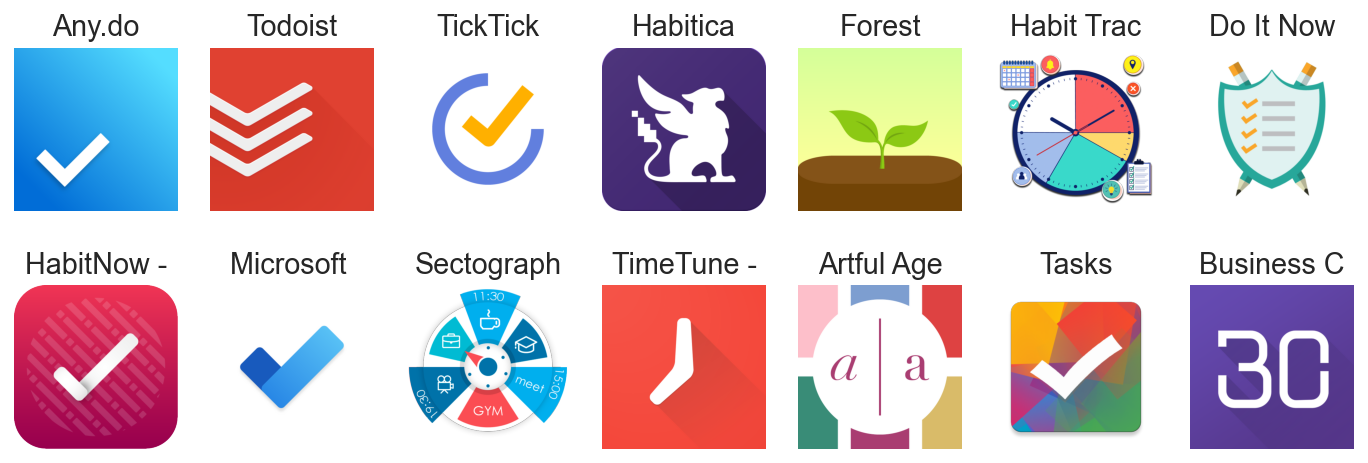

In [6]:
fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(12,4))

def format_title(title):
    sep_index = title.find(':') if title.find(':') != -1 else title.find('.')
    if sep_index != -1:
        title = title[:sep_index]
    return title[:10]

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
    ax.set_title(format_title(ai['title'][:10]))
    ax.axis('off')

In [7]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head(5)

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,...,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,appId,url
0,"Any.do: To do list, Task, Reminders & Planner","🥇 <b>""#1 to do list app out there”</b> - WSJ\r...",🥇 <b>&quot;#1 to do list app out there”</b> - ...,To-do list & Tasks ✅ Calendar 📅ֿ Reminder 🔔 ...,To-do list &amp; Tasks ✅ Calendar 📅ֿ Reminde...,"10,000,000+",10000000,4.349288,364234,128980,...,None,False,"Nov 10, 2011",1614496999,Varies with device,"- Dark mode is finally here, hooray! \r\n- Rec...","- Dark mode is finally here, hooray! <br>- Rec...",False,com.anydo,https://play.google.com/store/apps/details?id=...
1,"Todoist: To-Do List, Tasks & Reminders","🏆 <b>2020 Editor's Choice</b> by Google\r\n🥇 ""...",🏆 <b>2020 Editor&#39;s Choice</b> by Google<br...,"""The best to-do list"" — The Verge. Tasks ✅ Rem...",&quot;The best to-do list&quot; — The Verge. T...,"10,000,000+",10000000,4.555162,219857,66800,...,None,False,"Nov 18, 2012",1614609241,Varies with device,⭐️ Personalize your mobile icon\r\nMake Todois...,⭐️ Personalize your mobile icon<br>Make Todois...,True,com.todoist,https://play.google.com/store/apps/details?id=...
2,"TickTick: ToDo List Planner, Reminder & Calendar",🏆<b>Editor's Choice</b> by Google\r\n🥇<b>Great...,🏆<b>Editor&#39;s Choice</b> by Google<br>🥇<b>G...,Task & time manager by Editor’s Choice🏆. Get t...,Task &amp; time manager by Editor’s Choice🏆. G...,"1,000,000+",1000000,4.609077,74685,27303,...,None,False,"Jun 19, 2013",1614589211,Varies with device,✍️ Smoother experience of Markdown.\r\n📱 Adapt...,✍️ Smoother experience of Markdown.<br>📱 Adapt...,True,com.ticktick.task,https://play.google.com/store/apps/details?id=...
3,Habitica: Gamify Your Tasks,Treat your life like a game to stay motivated ...,Treat your life like a game to stay motivated ...,Treat your life like a game to stay motivated ...,Treat your life like a game to stay motivated ...,"1,000,000+",1000000,4.269705,18530,7717,...,None,False,"Dec 10, 2015",1613659948,3.1.2,This update is full of bug fixes and quality o...,This update is full of bug fixes and quality o...,False,com.habitrpg.android.habitica,https://play.google.com/store/apps/details?id=...
4,Forest: Stay focused,<b>★ Google Play 2015-2016 Best App of the Yea...,<b>★ Google Play 2015-2016 Best App of the Yea...,"Beat phone addiction, eliminate distractions, ...","Beat phone addiction, eliminate distractions, ...","10,000,000+",10000000,4.596494,301941,106528,...,True,True,"Aug 25, 2014",1614911248,Varies with device,• Some bug fixes.,• Some bug fixes.,True,cc.forestapp,https://play.google.com/store/apps/details?id=...


In [8]:
app_infos_df.to_csv('apps.csv', index = None, header=True )

## Get App Reviews

In [9]:
app_reviews = []

for ap in tqdm(app_packages):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
          rvs, _ = reviews(
            ap,
            lang='en',
            country='us',
            sort=sort_order,
            count= 200 if score == 3 else 100,
            filter_score_with=score
          )
          for r in rvs:
            r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
            r['appId'] = ap
    app_reviews.extend(rvs)

100%|██████████| 15/15 [00:50<00:00,  3.34s/it]


In [10]:
print_json(app_reviews[0])

{
  "appId": "com.anydo",
  "at": "2021-03-06 14:30:56",
  "content": "Works very well. Easy to use.",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "5.10.0.8",
  "reviewId": "gp:AOqpTOEkXq7AZGDThR7mjf9p1rhIQYTTFWBHyk2yCwhKE3RkhT2dBloJlPWNDnWYRV7cZUr3nONA1bGyVryfjw",
  "score": 5,
  "sortOrder": "newest",
  "thumbsUpCount": 0,
  "userImage": "https://play-lh.googleusercontent.com/a-/AOh14GjrYv85vc5ssJGD1em-0RswcNovW2PaWfIYkHfrCw",
  "userName": "Cindy Pagani"
}



In [11]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.shape

(1500, 12)

In [12]:
app_reviews_df.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEkXq7AZGDThR7mjf9p1rhIQYTTFWBHyk2yCwh...,Cindy Pagani,https://play-lh.googleusercontent.com/a-/AOh14...,Works very well. Easy to use.,5,0,5.10.0.8,2021-03-06 14:30:56,None,NaT,newest,com.anydo
1,gp:AOqpTOEdJ3PxtYX_0Rl15Cch57mThInNkFkHGWj1kdk...,Jannat Tamanna,https://play-lh.googleusercontent.com/-jMPkQUL...,Nice app,5,0,None,2021-03-06 13:40:40,None,NaT,newest,com.anydo
2,gp:AOqpTOEd8np_el94yriSUYyH5B3IcsgDCQWO3GieRKs...,Maryem Ait idir,https://play-lh.googleusercontent.com/a-/AOh14...,Perfect app ♡♡,5,0,5.11.1.2,2021-03-06 11:58:55,None,NaT,newest,com.anydo
3,gp:AOqpTOGw7fzcZgOPNIg4w0xgwe_UxgqyiQKo3Ehp5Cu...,Nina Wurman,https://play-lh.googleusercontent.com/-vAaUHUo...,Any.do is totally integrated into my day! I co...,5,0,5.11.1.2,2021-03-06 11:40:25,None,NaT,newest,com.anydo
4,gp:AOqpTOG9y3VusCD3kPHiknQyyQiDrTpRjVab68T4Dfn...,Sheshan Fernando,https://play-lh.googleusercontent.com/a-/AOh14...,Wow its good app is nice please do WhatsApp re...,5,0,5.11.1.2,2021-03-06 07:30:08,None,NaT,newest,com.anydo


In [13]:
app_reviews_df.to_csv('reviews.csv', index = None, header = True)